# Pip install 

In [1]:
pip install tensorflow==2.9.1 tensorflow-gpu==2.9.1 opencv-python mediapipe

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [2]:
import cv2
import time
import os
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

# Defining functions

In [3]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

# Detection model function

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

# Drawing landmark to the model

In [5]:
#Giving design to landmarks
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(250,110,50), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(60,75,241), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,200,80), thickness=2, circle_radius=2),
                             mp_drawing.DrawingSpec(color=(43,37,239), thickness=2, circle_radius=2))
                             
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,200,80), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(43,37,239), thickness=2, circle_radius=2))

# Capturing the sample photo

In [6]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed
        
        ret, frame = cap.read()

                #make detection
        image, results = mediapipe_detection(frame,holistic)
        print(results)
        
    
        #draw landmarks
        draw_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCv feed', image)

        #break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
#frames 
frame

array([[[189, 189, 170],
        [185, 183, 165],
        [182, 179, 161],
        ...,
        [145, 147, 147],
        [145, 146, 146],
        [144, 146, 144]],

       [[192, 191, 173],
        [188, 187, 169],
        [186, 184, 166],
        ...,
        [144, 148, 148],
        [145, 149, 148],
        [145, 148, 147]],

       [[195, 195, 178],
        [193, 193, 175],
        [193, 192, 174],
        ...,
        [143, 150, 150],
        [143, 149, 148],
        [142, 148, 147]],

       ...,

       [[ 17,  12,   6],
        [ 18,  13,   7],
        [ 19,  14,   8],
        ...,
        [145, 152, 154],
        [150, 156, 158],
        [160, 166, 168]],

       [[ 16,  11,   5],
        [ 16,  11,   5],
        [ 16,  11,   5],
        ...,
        [145, 152, 154],
        [150, 157, 159],
        [161, 167, 169]],

       [[ 17,  12,   6],
        [ 16,  11,   5],
        [ 16,  11,   5],
        ...,
        [143, 151, 153],
        [148, 155, 157],
        [159, 165, 167]]

In [8]:
#length of the landmark results
len(results.left_hand_landmarks.landmark)

21

In [9]:
#define the landmarks
draw_landmarks(frame, results)

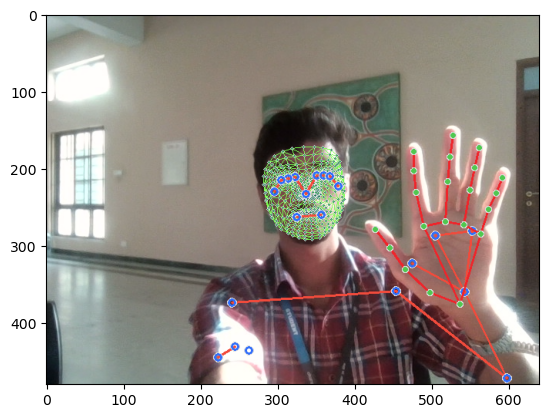

In [10]:
#image from the sample photo
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
#pose landmark function
pose = []
for res in results.left_hand_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    test_1 = np.array([res.x, res.y, res.z])
    pose.append([test, test_1])

In [13]:
#calling pose
pose

[[array([8.39759409e-01, 7.84239829e-01, 5.40898725e-07]),
  array([8.39759409e-01, 7.84239829e-01, 5.40898725e-07])],
 [array([ 0.77836955,  0.75239688, -0.03195115]),
  array([ 0.77836955,  0.75239688, -0.03195115])],
 [array([ 0.72819149,  0.69078857, -0.04956845]),
  array([ 0.72819149,  0.69078857, -0.04956845])],
 [array([ 0.69825733,  0.63146967, -0.0641107 ]),
  array([ 0.69825733,  0.63146967, -0.0641107 ])],
 [array([ 0.66763997,  0.5815742 , -0.07834735]),
  array([ 0.66763997,  0.5815742 , -0.07834735])],
 [array([ 0.76655924,  0.57454401, -0.0321362 ]),
  array([ 0.76655924,  0.57454401, -0.0321362 ])],
 [array([ 0.75147396,  0.48136225, -0.05589598]),
  array([ 0.75147396,  0.48136225, -0.05589598])],
 [array([ 0.746355  ,  0.42473274, -0.07380349]),
  array([ 0.746355  ,  0.42473274, -0.07380349])],
 [array([ 0.74552023,  0.37265629, -0.08646851]),
  array([ 0.74552023,  0.37265629, -0.08646851])],
 [array([ 0.81007308,  0.56140059, -0.03416498]),
  array([ 0.81007308,  

In [14]:
#Extract keypoints of lefthand and right hand
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [15]:
#key points were set into the arry
results_text = extract_keypoints(results)

In [16]:
#calling the array
results_text[:10]

array([ 8.39759409e-01,  7.84239829e-01,  5.40898725e-07,  7.78369546e-01,
        7.52396882e-01, -3.19511481e-02,  7.28191495e-01,  6.90788567e-01,
       -4.95684482e-02,  6.98257327e-01])

# Defining the data path

In [17]:
#definig the data path for the folder
DATA_PATH = os.path.join('Sigma_sri')

#set of actions 
actions = np.array(['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday','Sunday'])

#set number of sequence to 30
no_sequences = 30

#sequence length of the video is 30sec
sequence_length = 30

In [18]:
#Using the action and sequence creating the directory path
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


# Training phase of the model

In [23]:
#Training phase of the model

'''cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
                
                image, results = mediapipe_detection(frame, holistic)
                
                draw_landmarks(image, results)
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0),4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_COMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                    
                else:
                    cv2.putText(image, 'Collecting frames for {} video Number {}'.format(action,sequence), (15,12),
                               cv2.FONT_HERSHEY_COMPLEX, 0.5,(0,0,255),1, cv2.LINE_AA)
                    
                    cv2.imshow('OpenCv Feed', image)
                    
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence),str(frame_num))
                np.save(npy_path, keypoints)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()'''

# Train test spliting 

In [61]:
#sklearn to import the necessary packages
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [20]:
#Creating the label map for training image
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [22]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res =  np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(210, 30, 126)

In [24]:
np.array(labels).shape

(210,)

In [25]:
x = np.array(sequences)

In [26]:
x.shape

(210, 30, 126)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
y.shape

(210, 7)

In [29]:
#train test spliting
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3)

In [30]:
Y_test.shape

(63, 7)

# Importing Tensorflow models

In [60]:
#Importing the tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

# LSTM model

In [55]:
#LSTM
model =Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [56]:
#LSTM model compile
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [57]:
#LSTM model

model.fit(X_train, Y_train, epochs=2000)

Epoch 1/2000
5/5 [==============================] - 4s 59ms/step - loss: 1.9317 - categorical_accuracy: 0.2313
Epoch 2/2000
5/5 [==============================] - 0s 49ms/step - loss: 1.8063 - categorical_accuracy: 0.2925
Epoch 3/2000
5/5 [==============================] - 0s 50ms/step - loss: 1.7342 - categorical_accuracy: 0.2925
Epoch 4/2000
5/5 [==============================] - 0s 53ms/step - loss: 1.6640 - categorical_accuracy: 0.3605
Epoch 5/2000
5/5 [==============================] - 0s 63ms/step - loss: 1.5544 - categorical_accuracy: 0.3469
Epoch 6/2000
5/5 [==============================] - 0s 64ms/step - loss: 1.9205 - categorical_accuracy: 0.2313
Epoch 7/2000
5/5 [==============================] - 0s 63ms/step - loss: 1.9069 - categorical_accuracy: 0.2585
Epoch 8/2000
5/5 [==============================] - 0s 63ms/step - loss: 1.8142 - categorical_accuracy: 0.2517
Epoch 9/2000
5/5 [==============================] - 0s 64ms/step - loss: 1.7912 - categorical_accuracy: 0.2245
E

In [42]:
#LSTM summary 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 7)                 231       
                                                                 
Total params: 203,591
Trainable params: 203,591
Non-tr

In [44]:
#LSTM predict
yhat = model.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [45]:
#LSTM
ytrue = np.argmax(Y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [46]:
#LSTM accuracy
accuracy_score(ytrue,yhat)

0.9365079365079365

In [47]:
#LSTM RESULTS

sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# GRU model

In [38]:
#GRU
model_1 = Sequential()
model_1.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model_1.add(GRU(128, return_sequences=True, activation='relu'))
model_1.add(GRU(64, return_sequences=False, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(actions.shape[0], activation='softmax'))

In [40]:
#GRU model compile
model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [41]:
#GRU model

model_1.fit(X_train, Y_train, epochs=2000)

Epoch 1/2000
5/5 [==============================] - 5s 50ms/step - loss: 1.9430 - categorical_accuracy: 0.1224
Epoch 2/2000
5/5 [==============================] - 0s 44ms/step - loss: 1.9309 - categorical_accuracy: 0.2245
Epoch 3/2000
5/5 [==============================] - 0s 46ms/step - loss: 1.9224 - categorical_accuracy: 0.2789
Epoch 4/2000
5/5 [==============================] - 0s 46ms/step - loss: 1.9038 - categorical_accuracy: 0.3401
Epoch 5/2000
5/5 [==============================] - 0s 49ms/step - loss: 1.8862 - categorical_accuracy: 0.4218
Epoch 6/2000
5/5 [==============================] - 0s 45ms/step - loss: 1.8551 - categorical_accuracy: 0.4626
Epoch 7/2000
5/5 [==============================] - 0s 43ms/step - loss: 1.7888 - categorical_accuracy: 0.4626
Epoch 8/2000
5/5 [==============================] - 0s 47ms/step - loss: 1.7290 - categorical_accuracy: 0.3946
Epoch 9/2000
5/5 [==============================] - 0s 47ms/step - loss: 1.5936 - categorical_accuracy: 0.5374
E

In [43]:
#GRU summary
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 30, 64)            36864     
                                                                 
 gru_13 (GRU)                (None, 30, 128)           74496     
                                                                 
 gru_14 (GRU)                (None, 64)                37248     
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 7)                 231       
                                                                 
Total params: 155,079
Trainable params: 155,079
Non-tr

In [48]:
#GRU predict
yhat_1 = model_1.predict(X_test)

2/2 [==============================] - 0s 24ms/step


In [49]:
#GRU
ytrue_1 = np.argmax(Y_test, axis=1).tolist()
yhat_1 = np.argmax(yhat_1, axis=1).tolist()

In [58]:
#GRU accuracy
accuracy_score(ytrue_1,yhat_1)

0.9047619047619048

In [54]:
#GRU RESULTS

sequence = []
sentence = []
threshold = 0.5

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model_1.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            
        cv2.imshow('OpenCv Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
                                    
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

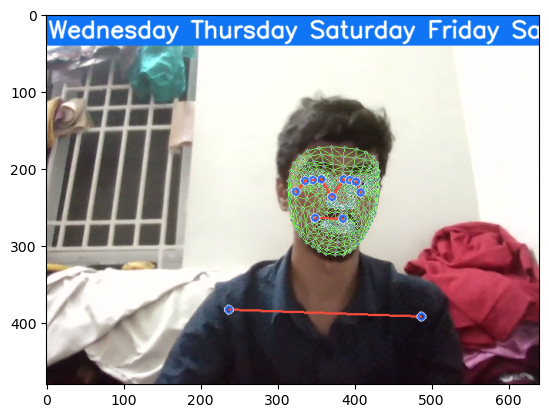

In [77]:
#Output of the function
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))